In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from vtl.Readfile import Readfile
from vtl.Photo import Photometry
import pandas as pd
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [3]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

In [15]:
phot_db = pd.read_pickle('../data/phot_db.pkl')
gphot_db = pd.read_pickle('../data/gphot_db.pkl')

In [16]:
gphot_db

,eff_wv,fwhm,n14713,n14713_err,n16758,n16758_err,n17070,n17070_err,n19442,n19442_err,...,s45972,s45972_err,s46066,s46066_err,s46345,s46345_err,s47677,s47677_err,s48631,s48631_err
F850LP,9001,1235,-9.900000e+01,-9.900000e+01,1.747697e-18,2.422580e-19,1.529235e-18,4.663560e-19,3.264858e-19,3.000168e-19,...,2.011440e-18,2.151872e-19,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,5.076848e-19,2.006029e-19,1.673274e-18,3.372973e-19
F098M,9841,1163,9.769333e-19,2.634086e-19,2.098037e-18,1.445953e-19,1.996690e-18,2.641406e-19,3.732585e-19,2.511762e-19,...,2.273222e-18,1.341041e-19,-9.900000e+01,-9.900000e+01,2.392788e-19,1.000450e-19,6.410471e-19,1.298577e-19,1.888517e-18,1.678651e-19
Subaru-IA827,8245,245,8.229581e-19,8.340300e-19,1.344934e-18,4.807593e-19,1.026516e-18,9.274676e-19,3.103016e-19,5.189770e-19,...,1.572377e-18,4.653268e-19,5.621589e-19,6.620920e-19,2.536885e-19,3.105887e-19,3.113629e-19,3.917838e-19,1.490061e-18,9.242394e-19
Subaru-IA856,8563,266,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,1.064267e-18,6.100259e-19,2.494950e-19,3.569217e-19,...,1.782134e-18,2.815424e-19,6.039884e-19,4.402900e-19,-9.900000e+01,-9.900000e+01,3.919963e-19,2.617631e-19,1.533059e-18,5.284655e-19
Subaru-suprime-z,9077,970,7.964886e-19,3.818980e-19,1.796225e-18,2.212656e-19,1.541097e-18,4.311053e-19,3.083753e-19,2.809899e-19,...,2.043646e-18,1.945843e-19,6.294148e-19,2.951754e-19,2.333093e-19,1.460643e-19,5.240084e-19,1.831599e-19,1.641221e-18,2.742698e-19


In [31]:
print gphot_db['s39170']
print gphot_db['s39170_err']
print '-------------------------'
# print phot_db['s39170']
print phot_db['s39170'][['s_F850LP','s_F850LPcand','n_F850LP','s_F098M','s_IA827','s_IA856','n_Z']]
print phot_db['s39170_err'][['s_F850LP','s_F850LPcand','n_F850LP','s_F098M','s_IA827','s_IA856','n_Z']]

F850LP              4.039693e-18
F098M               4.505023e-18
Subaru-IA827        3.277644e-18
Subaru-IA856        3.327478e-18
Subaru-suprime-z    4.160597e-18
Name: s39170, dtype: float64
F850LP              2.542565e-19
F098M               1.586512e-19
Subaru-IA827        5.852868e-19
Subaru-IA856        3.272110e-19
Subaru-suprime-z    2.272872e-19
Name: s39170_err, dtype: float64
-------------------------
s_F850LP        32.128795
s_F850LPcand   -99.000000
n_F850LP       -99.000000
s_F098M         44.080278
s_IA827         20.969773
s_IA856         24.557825
n_Z            -99.000000
Name: s39170, dtype: float64
s_F850LP         0.068761
s_F850LPcand   -99.000000
n_F850LP       -99.000000
s_F098M          0.067520
s_IA827          0.509540
s_IA856          0.392853
n_Z            -99.000000
Name: s39170_err, dtype: float64


In [18]:
Clam = 3E18 / phot_db['eff_wv'][['s_F850LP','s_F098M','s_IA827','s_IA856','n_Z']] **2 * 10**((-1.1)/2.5-29)
print Clam

s_F850LP    1.344435e-19
s_F098M     1.124716e-19
s_IA827     1.602286e-19
s_IA856     1.485489e-19
n_Z         1.322016e-19
Name: eff_wv, dtype: float64


In [19]:
s_F850LP = np.zeros(len(galDB.index))
s_F850LPcand = np.zeros(len(galDB.index))
n_F850LP = np.zeros(len(galDB.index))
s_F098M = np.zeros(len(galDB.index))
s_IA827 = np.zeros(len(galDB.index))
s_IA856 = np.zeros(len(galDB.index))
n_Z = np.zeros(len(galDB.index))

for i in range(len(galDB.index)):
    if gphot_db[galDB['gids'][galDB.index[i]]]['F850LP'] < 0 or phot_db[galDB['gids'][galDB.index[i]]]['s_F850LP']  < 0:
        s_F850LP[i] = np.nan
    else:
        s_F850LP[i] = gphot_db[galDB['gids'][galDB.index[i]]]['F850LP'] / (phot_db[galDB['gids'][galDB.index[i]]]['s_F850LP']*Clam[0])
    ##########################################################################################
    if gphot_db[galDB['gids'][galDB.index[i]]]['F850LP']  < 0 or phot_db[galDB['gids'][galDB.index[i]]]['s_F850LPcand']  < 0:
        s_F850LPcand[i] = np.nan
    else:
        s_F850LPcand[i] = gphot_db[galDB['gids'][galDB.index[i]]]['F850LP'] / (phot_db[galDB['gids'][galDB.index[i]]]['s_F850LPcand']*Clam[0])
    ##########################################################################################
    if gphot_db[galDB['gids'][galDB.index[i]]]['F850LP']  < 0 or phot_db[galDB['gids'][galDB.index[i]]]['n_F850LP']  < 0:
        n_F850LP[i] = np.nan
    else:
        n_F850LP[i] = gphot_db[galDB['gids'][galDB.index[i]]]['F850LP'] / (phot_db[galDB['gids'][galDB.index[i]]]['n_F850LP']*Clam[0])
    ##########################################################################################
    if gphot_db[galDB['gids'][galDB.index[i]]]['F098M']  < 0 or phot_db[galDB['gids'][galDB.index[i]]]['s_F098M']  < 0:
        s_F098M[i] = np.nan
    else:
        s_F098M[i] = gphot_db[galDB['gids'][galDB.index[i]]]['F098M'] / (phot_db[galDB['gids'][galDB.index[i]]]['s_F098M']*Clam[1])
    ##########################################################################################
    if gphot_db[galDB['gids'][galDB.index[i]]]['Subaru-IA827']  < 0 or phot_db[galDB['gids'][galDB.index[i]]]['s_IA827']  < 0:
        s_IA827[i] = np.nan
    else:
        s_IA827[i] = gphot_db[galDB['gids'][galDB.index[i]]]['Subaru-IA827'] / (phot_db[galDB['gids'][galDB.index[i]]]['s_IA827']*Clam[2])
    ##########################################################################################
    if gphot_db[galDB['gids'][galDB.index[i]]]['Subaru-IA856']  < 0 or phot_db[galDB['gids'][galDB.index[i]]]['s_IA856']  < 0:
        s_IA856[i] = np.nan
    else:
        s_IA856[i] = gphot_db[galDB['gids'][galDB.index[i]]]['Subaru-IA856'] / (phot_db[galDB['gids'][galDB.index[i]]]['s_IA856']*Clam[3])
    ##########################################################################################
    if gphot_db[galDB['gids'][galDB.index[i]]]['Subaru-suprime-z']  < 0 or phot_db[galDB['gids'][galDB.index[i]]]['n_Z']  < 0:
        n_Z[i] = np.nan
    else:
        n_Z[i] = gphot_db[galDB['gids'][galDB.index[i]]]['Subaru-suprime-z'] / (phot_db[galDB['gids'][galDB.index[i]]]['n_Z']*Clam[4])

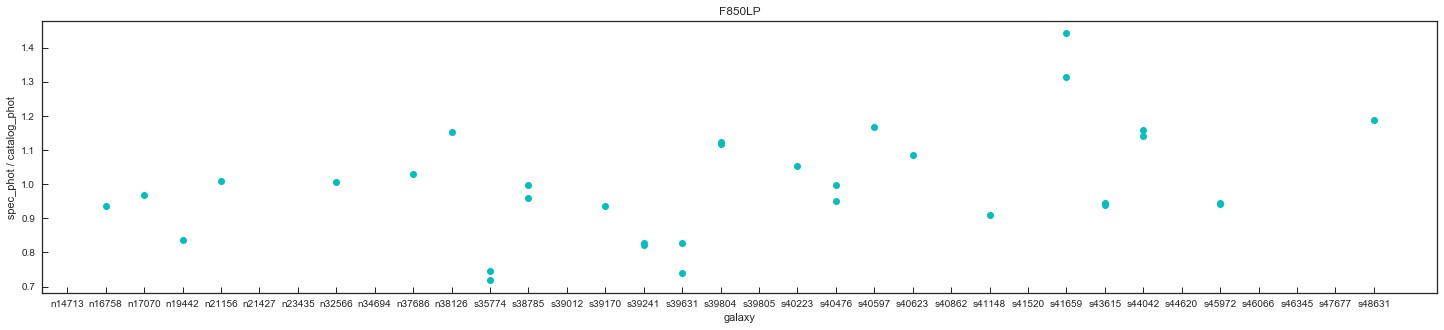

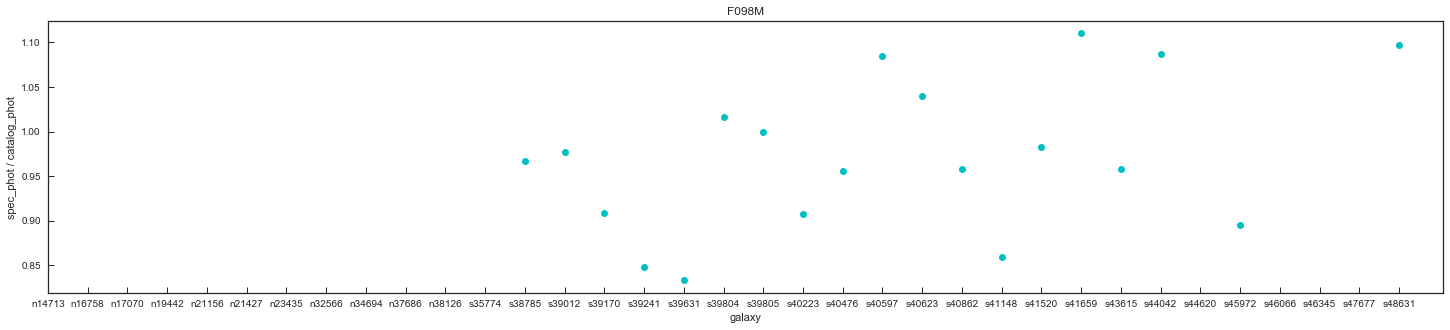

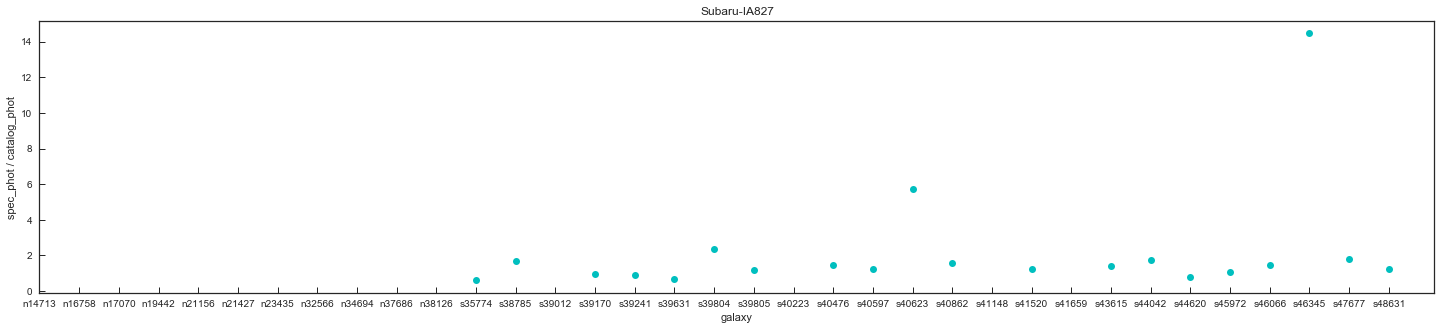

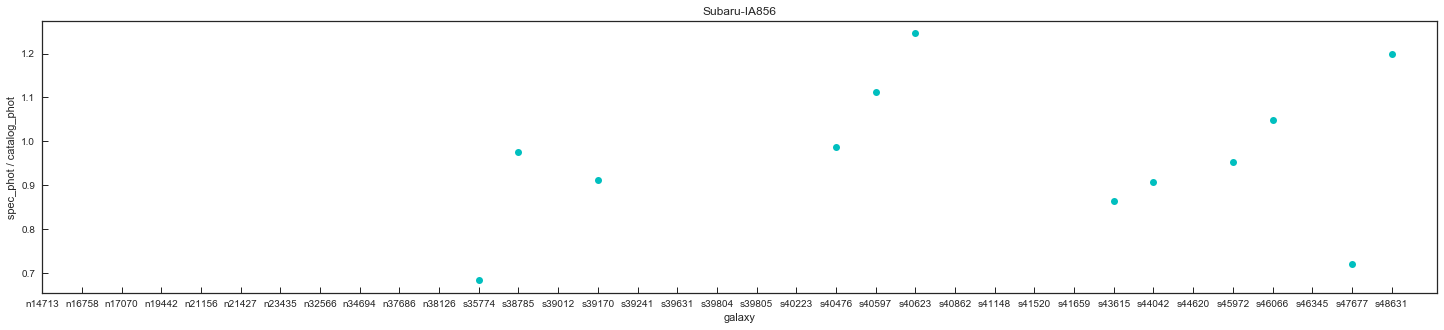

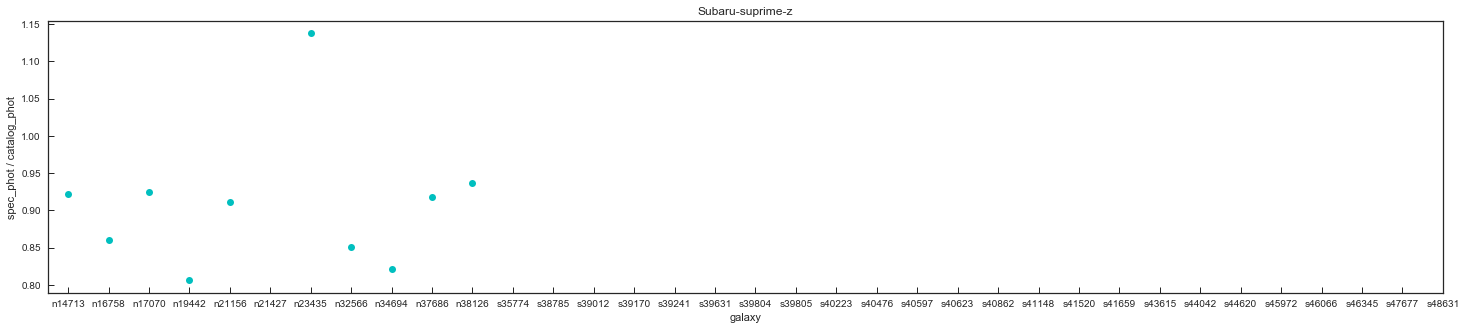

In [21]:
%matplotlib inline

plt.figure(figsize=[25,5])
plt.plot(s_F850LP,'co')
plt.plot(s_F850LPcand,'co')
plt.plot(n_F850LP,'co')
plt.xticks(range(len(galDB['gids'])),galDB['gids'])
plt.title('F850LP')
plt.ylabel('spec_phot / catalog_phot')
plt.xlabel('galaxy')
plt.show()
plt.close()

plt.figure(figsize=[25,5])
plt.plot(s_F098M,'co')
plt.xticks(range(len(galDB['gids'])),galDB['gids'])
plt.title('F098M')
plt.ylabel('spec_phot / catalog_phot')
plt.xlabel('galaxy')
plt.show()
plt.close()

plt.figure(figsize=[25,5])
plt.plot(s_IA827,'co')
plt.xticks(range(len(galDB['gids'])),galDB['gids'])
plt.title('Subaru-IA827')
plt.ylabel('spec_phot / catalog_phot')
plt.xlabel('galaxy')
plt.show()
plt.close()

plt.figure(figsize=[25,5])
plt.plot(s_IA856,'co')
plt.xticks(range(len(galDB['gids'])),galDB['gids'])
plt.title('Subaru-IA856')
plt.ylabel('spec_phot / catalog_phot')
plt.xlabel('galaxy')
plt.show()
plt.close()

plt.figure(figsize=[25,5])
plt.plot(n_Z,'co')
plt.xticks(range(len(galDB['gids'])),galDB['gids'])
plt.title('Subaru-suprime-z')
plt.ylabel('spec_phot / catalog_phot')
plt.xlabel('galaxy')
plt.show()
plt.close()

In [22]:
print gphot_db['s39012']['Subaru-IA827']
print phot_db['s39012']['s_IA827']

2.61199662153e-19
-0.021611


In [34]:
phot_db[galDB['gids'][galDB.index[i]] + '_err']

s_F606Wcand    -99.000000
s_F606W        -99.000000
s_R            -99.000000
s_Rc           -99.000000
s_F775W        -99.000000
s_I            -99.000000
s_F814Wcand    -99.000000
s_F850LP       -99.000000
s_F850LPcand   -99.000000
s_F098M        -99.000000
s_F105W        -99.000000
s_F125W        -99.000000
s_J            -99.000000
s_tenisJ       -99.000000
s_F140W        -99.000000
s_H            -99.000000
s_tenisK       -99.000000
s_Ks           -99.000000
s_IA624        -99.000000
s_IA651        -99.000000
s_IA679        -99.000000
s_IA709        -99.000000
s_IA738        -99.000000
s_IA767        -99.000000
s_IA797        -99.000000
s_IA827        -99.000000
s_IA856        -99.000000
n_F606W          0.030325
n_R              0.056505
n_Rs             0.103917
n_I              0.111004
n_F775W          0.046393
n_Z              0.137709
n_F850LP         0.057810
n_F105W          0.029521
n_F125W          0.037133
n_J              0.115952
n_F140W          0.096722
n_H         

In [36]:
cs1 = np.zeros(len(galDB['gids']))
cs1_er = np.zeros(len(galDB['gids']))

cp1 = np.zeros(len(galDB['gids']))
cp1_er = np.zeros(len(galDB['gids']))
cp2 = np.zeros(len(galDB['gids']))
cp2_er = np.zeros(len(galDB['gids']))

for i in range(len(galDB.index)):
    if phot_db[galDB['gids'][galDB.index[i]]]['s_F850LP'] < 0 or phot_db[galDB['gids'][galDB.index[i]]]['s_F850LP'] < 0:
        cp1[i] = np.nan
        cp1_er[i] = np.nan
    else:
        cp1[i] = 2.5 * np.log10( phot_db[galDB['gids'][galDB.index[i]]]['s_F098M']/ phot_db[galDB['gids'][galDB.index[i]]]['s_F850LP'])
        cp1_er[i] = (2.5/2.3)*np.sqrt((phot_db[galDB['gids'][galDB.index[i]] + '_err']['s_F098M'] / phot_db[galDB['gids'][galDB.index[i]]]['s_F098M'])**2 +  
                                      (phot_db[galDB['gids'][galDB.index[i]]+ '_err']['s_F850LP'] / phot_db[galDB['gids'][galDB.index[i]]]['s_F850LP'])**2)
    ##########################################################################################
    if phot_db[galDB['gids'][galDB.index[i]]]['s_F850LP'] < 0 or phot_db[galDB['gids'][galDB.index[i]]]['s_F850LPcand'] < 0:
        cp2[i] = np.nan
        cp2_er[i] = np.nan
    else:
        cp2[i] = 2.5 * np.log10( phot_db[galDB['gids'][galDB.index[i]]]['s_F098M']/ phot_db[galDB['gids'][galDB.index[i]]]['s_F850LPcand'])
        cp2_er[i] = (2.5/2.3)*np.sqrt((phot_db[galDB['gids'][galDB.index[i]] + '_err']['s_F098M'] / phot_db[galDB['gids'][galDB.index[i]]]['s_F098M'])**2 +  
                                      (phot_db[galDB['gids'][galDB.index[i]]+ '_err']['s_F850LPcand'] / phot_db[galDB['gids'][galDB.index[i]]]['s_F850LPcand'])**2)
    ##########################################################################################
    if gphot_db[galDB['gids'][galDB.index[i]]]['F098M'] < 0 or gphot_db[galDB['gids'][galDB.index[i]]]['F850LP'] < 0:
        cs1[i] = np.nan
        cs1_er[i] = np.nan
    else:
        cs1[i] = 2.5 * np.log10(gphot_db[galDB['gids'][galDB.index[i]]]['F098M']/gphot_db[galDB['gids'][galDB.index[i]]]['F850LP'])
        cs1_er[i] = (2.5/2.3)*np.sqrt((gphot_db[galDB['gids'][galDB.index[i]] + '_err']['F098M'] / gphot_db[galDB['gids'][galDB.index[i]]]['F098M'])**2 +  
                                      (gphot_db[galDB['gids'][galDB.index[i]]+ '_err']['F850LP'] / gphot_db[galDB['gids'][galDB.index[i]]]['F850LP'])**2)

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  
/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10


In [52]:
zy1= [cs1[u] - cp1[u] for u in range(len(cs1)) if cs1[u] - cp1[u] < 0]
dzy1= [np.sqrt(cs1_er[u]**2 + cp1_er[u]**2) for u in range(len(cs1)) if cs1[u] - cp1[u] < 0]
# dzy1= [cp1_er[u]**2 for u in range(len(cs1)) if cs1[u] - cp1[u] < 0]
zy2= [cs1[u] - cp2[u] for u in range(len(cs1)) if cs1[u] - cp2[u] < 0]
dzy2= [np.sqrt(cs1_er[u]**2 + cp2_er[u]**2) for u in range(len(cs1)) if cs1[u] - cp2[u] < 0]
zyids= [galDB['gids'].values[u] for u in range(len(cs1)) if cs1[u] - cp2[u] < 0 or cs1[u] - cp1[u] < 0]

In [47]:
print np.array([cs1,cs1_er]).T

[[        nan         nan]
 [ 0.19836787  0.16826478]
 [ 0.28959071  0.36132309]
 [ 0.14536342  1.2380145 ]
 [ 0.3093903   0.11507889]
 [        nan         nan]
 [        nan         nan]
 [ 0.17419608  0.29303396]
 [ 0.23846964  0.16794838]
 [ 0.30860061  0.21384225]
 [ 0.15246544  0.41718771]
 [ 0.36441927  0.18356873]
 [ 0.21640559  0.24833453]
 [        nan         nan]
 [ 0.11837164  0.07839354]
 [ 0.15696538  0.1364069 ]
 [ 0.14989159  0.17700285]
 [ 0.29783967  0.43533967]
 [        nan         nan]
 [ 0.24452136  0.87910538]
 [ 0.24166782  0.20765711]
 [ 0.23916759  0.10978267]
 [ 0.3532799   0.43682235]
 [        nan         nan]
 [ 0.30906218  0.87607108]
 [        nan         nan]
 [ 0.13243581  1.59058379]
 [ 0.16145889  0.2512185 ]
 [ 0.33569927  0.48260885]
 [        nan         nan]
 [ 0.13283696  0.13279229]
 [        nan         nan]
 [        nan         nan]
 [ 0.25323936  0.48264416]
 [ 0.13138503  0.23946405]]


In [53]:
%matplotlib inline

plt.figure(figsize=[15,5])
plt.axhline(0,linestyle='--')
plt.errorbar(range(len(zy1)),zy1,dzy1,color='c',fmt='o')
# plt.errorbar(range(len(zy2)),zy2,dzy2,'co')
plt.xlim(-.5,9.5)
plt.xticks(range(len(zyids)),zyids)
# plt.title('F850LP')
plt.ylabel('$\Delta$(Z-Y)')
plt.xlabel('galaxy')
# plt.show()
plt.savefig('../plots/photometry_compare.png')
plt.close()